# Plot dataset from DataCube <img align="right" src="image/gistda.png" width="200" height="200">

 - [Plot RGB image of selected dataset](#Plot-RGB-image-of-selected-dataset)
 - [Plot RGB muti-image of dataset](#Plot-RGB-muti-image-of-dataset)
 - [Selecting and plotting a single timestep .isel()](#Selecting-and-plotting-a-single-timestep-.isel())
 - [Selecting data using a range of time .sel()](#Selecting-data-using-a-range-of-time-.sel())
 - [Plotting multiple timesteps](#Plotting-multiple-timesteps)
 
<table class="ee-notebook-buttons" align="left">
    <td><a target="_parent"  href="https://nbviewer.org/github/Pathakorn40/rice-detection/blob/main/Tutorial/Plot_image.ipynb"><img width=26px src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/883px-Jupyter_logo.svg.png" />Notebook Viewer</a></td>
</table>

In [1]:
# import package
import datacube 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### connect to datacube

In [2]:
#connect to datacube
dc = datacube.Datacube(app = "test1")

### Set parameters

In [3]:
# define AOI
lat = 11.800
lon = 99.790

# buffer distance
lon_buffer = 0.05
lat_buffer = 0.05

# date range for analysis
time_range = ("2015-01-01","2015-02-28")

# create bounding box of AOI from buffer
lat_range = (lat-lat_buffer, lat+lat_buffer)
lon_range = (lon-lon_buffer, lon+lon_buffer)

In [4]:
# set query for load data
query = {
    'y': lat_range,
    'x': lon_range,
    'time': time_range,
    'measurements': ['red', 'green', 'blue','nir'],
    'resolution': (-30, 30),
    'output_crs': 'epsg:32647',
    'group_by':'solar_day'
}

### Load data from query

In [5]:
# Loading data using dc.load()
ds = dc.load(product="ls8_collections_sr_scene",**query)
ds

<xarray.Dataset>
Dimensions:      (time: 4, y: 371, x: 365)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-04T03:38:36 ... 2015-02-21T03:...
  * y            (y) float64 1.31e+06 1.31e+06 1.31e+06 ... 1.299e+06 1.299e+06
  * x            (x) float64 5.806e+05 5.806e+05 ... 5.915e+05 5.915e+05
    spatial_ref  int32 32647
Data variables:
    red          (time, y, x) int16 1377 1312 967 827 762 ... 164 154 166 156
    green        (time, y, x) int16 1105 1073 871 764 706 ... 411 402 402 388
    blue         (time, y, x) int16 739 674 462 391 334 ... 415 414 408 410 399
    nir          (time, y, x) int16 2537 2986 3506 3146 2965 ... 100 90 102 101
Attributes:
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

The output above, There are 4 timesteps of the queried dataset.

### Plot RGB image of selected dataset
 In the case, we select first timestep (index = 0)

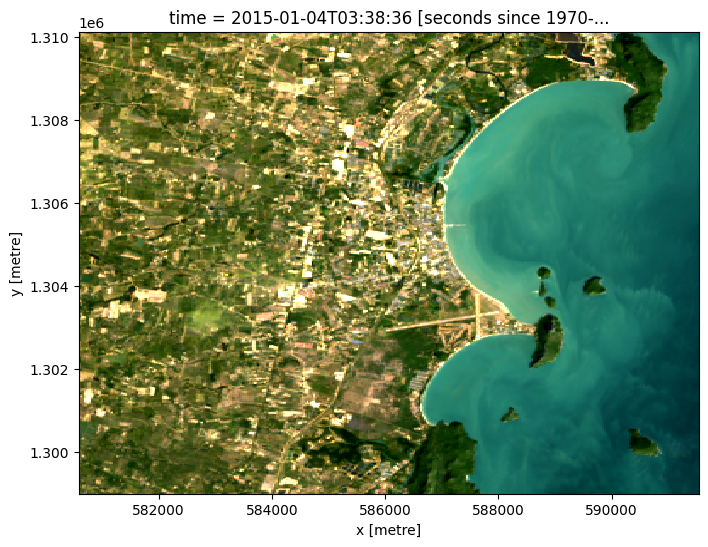

In [6]:
from dream_river.plotimg import rgb

rgb(ds, bands=['red','green', 'blue'], index =0) 

## Plot RGB muti-image of dataset

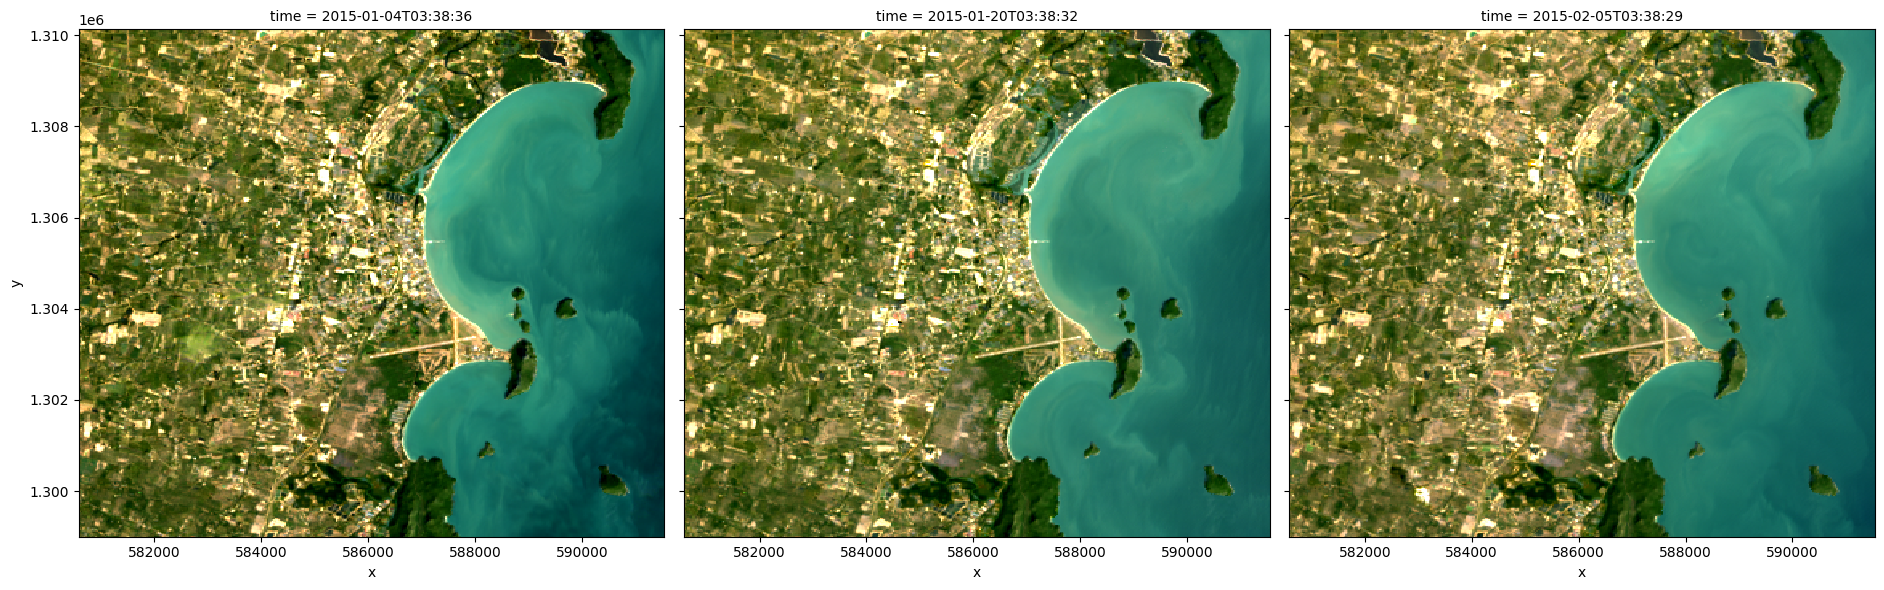

In [7]:
rgb(ds, bands=['red','green', 'blue'], index =[0,1,2]) 

#plot first, second and third timesteps.

## Selecting and plotting a single timestep .isel()
`.isel()`: This stands for "index selection", which selects individual timesteps from a dataset based on the sequence of loaded timesteps. 
Counting in Python begins at 0, so to select the first timestep in the `xarray.DataArray` we can specify `.isel(time=0)`:

In [8]:
%matplotlib inline

first_timestep = ds.nir.isel(time=0) # first timestep
first_timestep

<xarray.DataArray 'nir' (y: 371, x: 365)>
array([[2537, 2986, 3506, ...,  128,  127,  126],
       [2741, 2606, 3018, ...,  134,  134,  125],
       [3290, 3166, 2616, ...,  134,  127,  131],
       ...,
       [3143, 3178, 3174, ...,  111,  107,  107],
       [3527, 3406, 3394, ...,  110,  112,  107],
       [3381, 3264, 2969, ...,  111,  111,  107]], dtype=int16)
Coordinates:
    time         datetime64[ns] 2015-01-04T03:38:36
  * y            (y) float64 1.31e+06 1.31e+06 1.31e+06 ... 1.299e+06 1.299e+06
  * x            (x) float64 5.806e+05 5.806e+05 ... 5.915e+05 5.915e+05
    spatial_ref  int32 32647
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

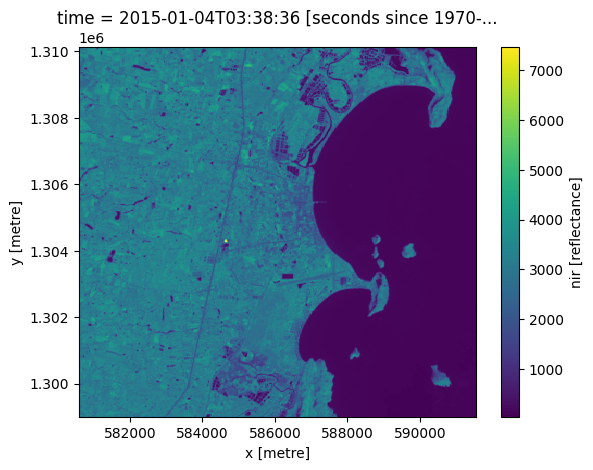

In [9]:
first_timestep.plot()

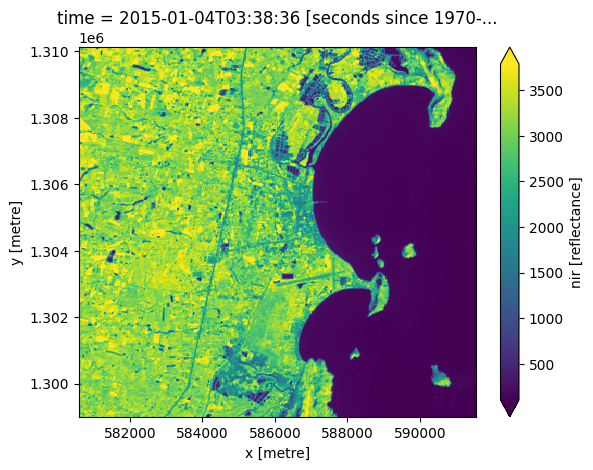

In [10]:
first_timestep.plot(robust = True) # robust = True: 5% brighter

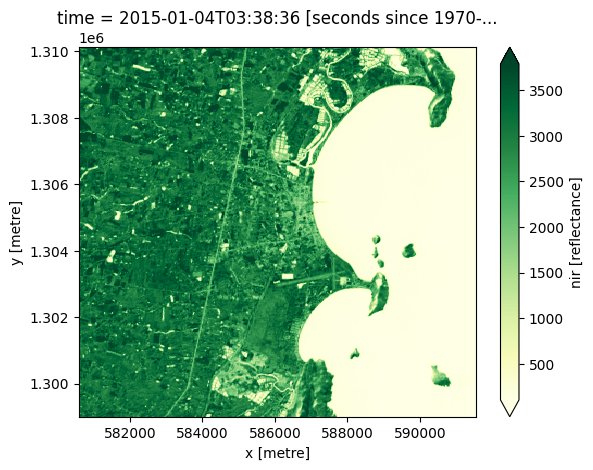

In [11]:
first_timestep.plot(robust = True, cmap="YlGn")

## Selecting data using a range of time .sel()
`.sel()`: This selects data using real-world coordinate labels like `time`. 
    For example, from the **Coordinates** section, the first timestep (i.e. the year 2015) is selected from the `xarray.DataArray` by specifying `.sel(time='2015')`:

In [12]:
first_timestep = ds.nir.sel(time='2015')

first_timestep

<xarray.DataArray 'nir' (time: 4, y: 371, x: 365)>
array([[[2537, 2986, 3506, ...,  128,  127,  126],
        [2741, 2606, 3018, ...,  134,  134,  125],
        [3290, 3166, 2616, ...,  134,  127,  131],
        ...,
        [3143, 3178, 3174, ...,  111,  107,  107],
        [3527, 3406, 3394, ...,  110,  112,  107],
        [3381, 3264, 2969, ...,  111,  111,  107]],

       [[2357, 2781, 3030, ...,  201,  204,  199],
        [2694, 2519, 2737, ...,  208,  204,  203],
        [3160, 2987, 2700, ...,  212,  207,  209],
        ...,
        [2991, 2999, 2814, ...,  168,  167,  170],
        [3259, 3183, 3027, ...,  170,  179,  173],
        [3214, 3121, 2790, ...,  179,  176,  171]],

       [[2373, 2725, 2865, ...,  171,  169,  165],
        [2665, 2502, 2710, ...,  170,  169,  171],
        [3175, 2818, 2700, ...,  175,  171,  171],
        ...,
        [2692, 2681, 2672, ...,  115,  117,  119],
        [2800, 2801, 2666, ...,  124,  120,  121],
        [2881, 2657, 2609, ...,  117,  124,  124]],

       [[2990, 3076, 3222, ...,  118,  120,  111],
        [3049, 3197, 3615, ...,  117,  121,  109],
        [3424, 3564, 4098, ...,  119,  129,  125],
        ...,
        [2796, 2691, 2872, ...,   98,   94,   94],
        [3031, 2618, 2788, ...,   84,  100,   86],
        [2956, 2501, 2775, ...,   90,  102,  101]]], dtype=int16)
Coordinates:
  * time         (time) datetime64[ns] 2015-01-04T03:38:36 ... 2015-02-21T03:...
  * y            (y) float64 1.31e+06 1.31e+06 1.31e+06 ... 1.299e+06 1.299e+06
  * x            (x) float64 5.806e+05 5.806e+05 ... 5.915e+05 5.915e+05
    spatial_ref  int32 32647
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32647
    grid_mapping:  spatial_ref

## Plotting multiple timesteps

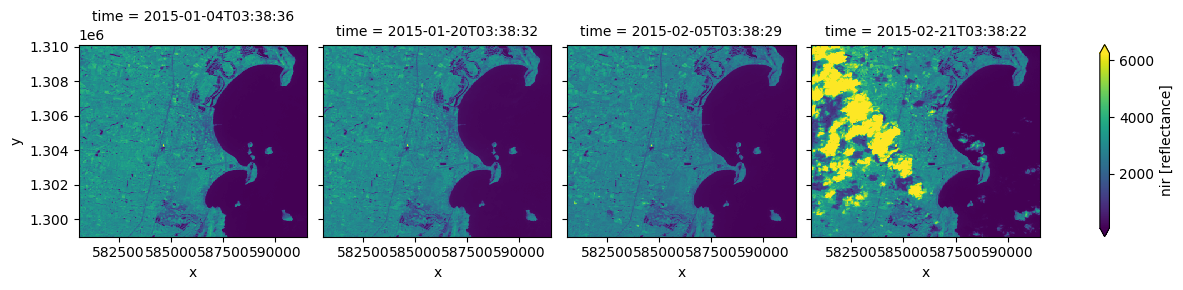

In [13]:
ds.nir.plot(col="time", robust=True)

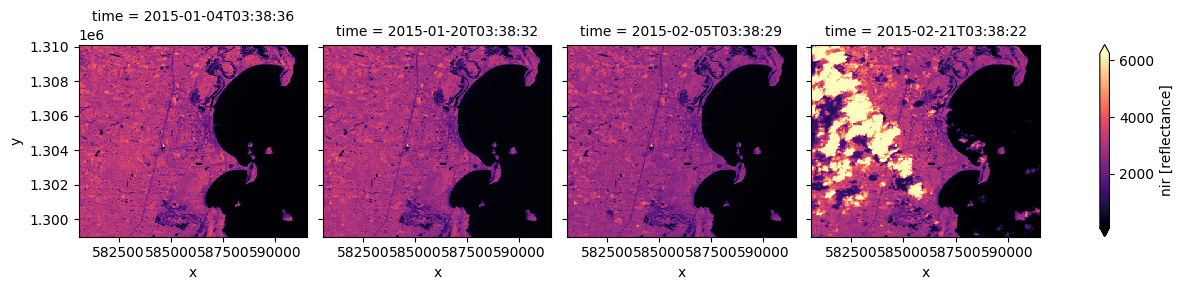

In [14]:
ds.nir.plot(col="time", robust=True, cmap="magma")